**데이터 제작 및 csv 파일 형성**

In [ ]:
import numpy as np
import pandas as pd  # CSV 저장을 위해 추가
from scipy.integrate import odeint
import os

# 감쇠 진동 미분방정식 정의
def damped_oscillator(y, t, b):
    x, v = y
    dydt = [v, -b * v - x]  # 방정식 (m=1, k=1일 때)
    return dydt

# 초기 조건
x0 = 1  # 초기 위치
v0 = 0  # 초기 속도
y0 = [x0, v0]

# 시간 범위 설정
t = np.linspace(0, 100, 10000)  # 더 많은 데이터 포인트

# b 값 범위 조정
b_values = np.linspace(0, 10, 100)

# 데이터를 저장할 폴더 생성
os.makedirs("damped_oscillation_data", exist_ok=True)

# 각 b 값에 대한 데이터 생성 및 CSV로 저장
for i, b in enumerate(b_values):
    solution = odeint(damped_oscillator, y0, t, args=(b,))
    x = solution[:, 0]

    # DataFrame 생성
    df = pd.DataFrame({'time': t, 'displacement': x})

    # CSV 파일로 저장
    csv_filename = f'damped_oscillation_data/damped_b_{i:03d}.csv'
    df.to_csv(csv_filename, index=False)

print("모든 데이터를 CSV 파일로 저장했습니다.")


모든 데이터를 CSV 파일로 저장했습니다.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 데이터 폴더 경로
data_folder = 'damped_oscillation_data'
csv_files = sorted(os.listdir(data_folder))  # CSV 파일 정렬

# 그래프를 저장할 폴더 생성
os.makedirs("damped_oscillation_plots", exist_ok=True)

# 모든 CSV 파일에 대해 그래프 생성
for csv_file in csv_files:
    # CSV 파일 경로 설정
    csv_path = os.path.join(data_folder, csv_file)

    # CSV 파일 로드
    data = pd.read_csv(csv_path)
    t = data['time'].values
    x = data['displacement'].values

    # 그래프 그리기
    plt.figure(figsize=(8, 4))
    plt.plot(t, x, label=f'{csv_file}', color='b')
    plt.xlabel('Time')
    plt.ylabel('Displacement')
    plt.title(f'Damped Oscillation: {csv_file}')

    # 그래프를 PNG 파일로 저장
    plot_filename = f"damped_oscillation_plots/{csv_file.replace('.csv', '.png')}"
    plt.savefig(plot_filename)

    # 그래프 창 닫기 (메모리 절약을 위해)
    plt.close()

print("모든 그래프가 생성되고 저장되었습니다.")


모든 그래프가 생성되고 저장되었습니다.


**진동 데이터 시각화**

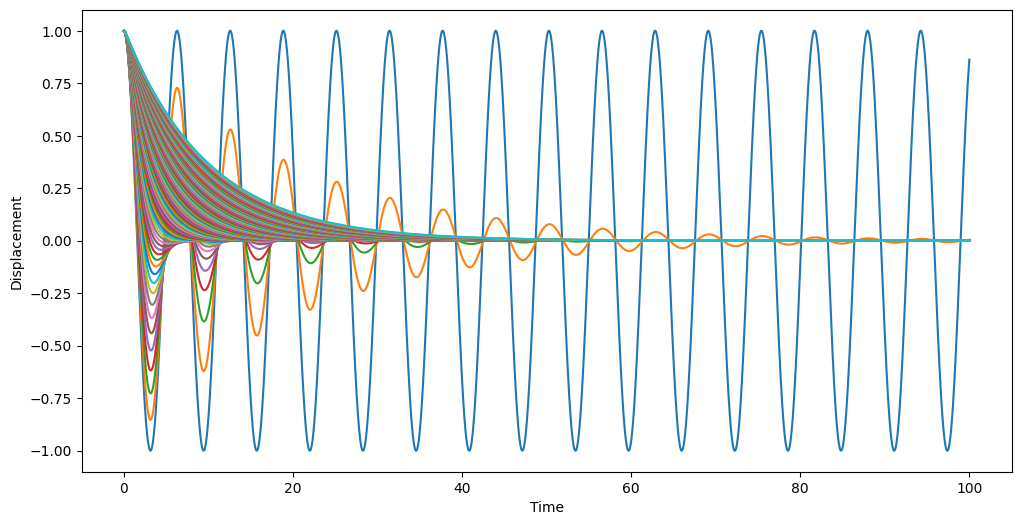

모든 데이터를 하나의 그래프에 표시하고 저장했습니다.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 데이터 폴더 경로
data_folder = 'damped_oscillation_data'
csv_files = sorted(os.listdir(data_folder))  # CSV 파일 정렬

# 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정

# 모든 CSV 파일의 데이터를 하나의 그래프에 추가
for csv_file in csv_files:
    # CSV 파일 경로 설정
    csv_path = os.path.join(data_folder, csv_file)

    # CSV 파일 로드
    data = pd.read_csv(csv_path)
    t = data['time'].values
    x = data['displacement'].values

    # 각 파일의 데이터를 그래프에 추가
    plt.plot(t, x, label=csv_file)

# 그래프 설정
plt.xlabel('Time')
plt.ylabel('Displacement')
#plt.title('Damped Oscillation: Combined View')
#plt.legend(loc='upper right', fontsize='small')  # 범례 추가 및 위치 조정

# 그래프 저장
plt.savefig('combined_damped_oscillation_plot.png')

# 그래프 보여주기
plt.show()

print("모든 데이터를 하나의 그래프에 표시하고 저장했습니다.")


Current working directory: /content


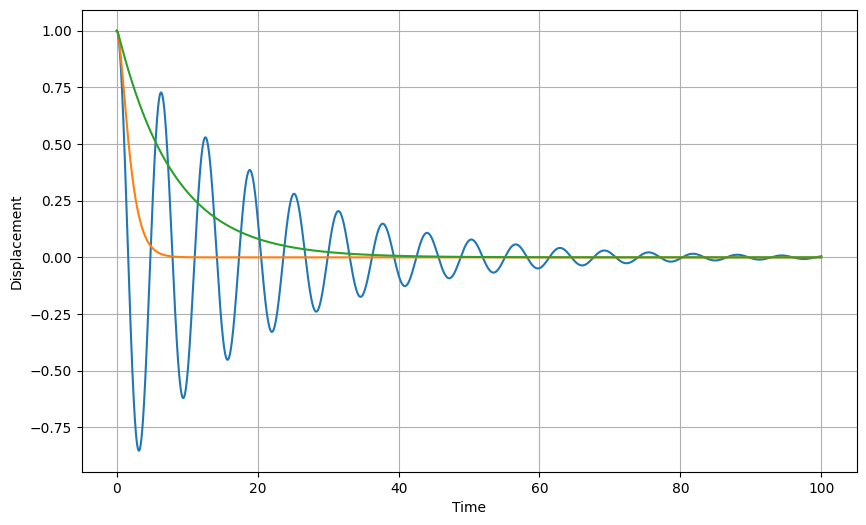

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 디렉토리 확인
print("Current working directory:", os.getcwd())

# 001, 020, 080 번째 데이터 파일 경로 설정
files = [
    'damped_oscillation_data/damped_b_001.csv',
    'damped_oscillation_data/damped_b_020.csv',
    'damped_oscillation_data/damped_b_080.csv'
]

# 그래프 그리기
plt.figure(figsize=(10, 6))

for file in files:
    if os.path.exists(file):
        data = pd.read_csv(file)
        plt.plot(data['time'], data['displacement'], label=f'{file.split("_")[-1].split(".")[0]}')
    else:
        print(f"File not found: {file}")

# 그래프 설정
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)

# 그래프 출력
plt.show()


**b값에 따라 다른 특성방정식의 해 구하기**

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import os

# 각 케이스에 따른 해의 함수 정의
def underdamped_solution(t, A, alpha, omega, phi):
    return A * np.exp(-alpha * t) * np.cos(omega * t + phi)

def critically_damped_solution(t, A, B, alpha):
    return (A + B * t) * np.exp(-alpha * t)

def overdamped_solution(t, A, B, r1, r2):
    return A * np.exp(r1 * t) + B * np.exp(r2 * t)

# 결과를 저장할 리스트
equations = []

# 데이터 폴더 경로 설정
data_folder = "damped_oscillation_data"

# 각 b 값에 대해 피팅 수행
for i, csv_file in enumerate(sorted(os.listdir(data_folder))):
    # CSV 파일 불러오기
    file_path = os.path.join(data_folder, csv_file)
    data = pd.read_csv(file_path)
    t = data['time'].values
    x = data['displacement'].values

    # b 값 계산 (0에서 10까지 균일하게 분포)
    b = i * (10 / 99)

    # 각 b 값에 따른 해 형태 선택
    if b < 2:  # Underdamped
        initial_guess = [1, b / 2, np.sqrt(1 - (b / 2) ** 2), 0]
        try:
            popt, _ = curve_fit(underdamped_solution, t, x, p0=initial_guess)
            A, alpha, omega, phi = popt
            equation = f"x(t) = {A:.4f} * exp(-{alpha:.4f} * t) * cos({omega:.4f} * t + {phi:.4f})"

        except RuntimeError:
            equation = "피팅 실패"

    elif b == 2:  # Critically Damped
        initial_guess = [1, 1, b / 2]
        try:
            popt, _ = curve_fit(critically_damped_solution, t, x, p0=initial_guess)
            A, B, alpha = popt
            equation = f"x(t) = ({A:.4f} + {B:.4f} * t) * exp(-{alpha:.4f} * t)"

        except RuntimeError:
            equation = "피팅 실패"

    else:  # Overdamped
        r1 = -b / 2 + np.sqrt((b / 2) ** 2 - 1)
        r2 = -b / 2 - np.sqrt((b / 2) ** 2 - 1)
        initial_guess = [1, 1, r1, r2]
        try:
            popt, _ = curve_fit(overdamped_solution, t, x, p0=initial_guess)
            A, B, r1_fit, r2_fit = popt
            equation = f"x(t) = {A:.4f} * exp({r1_fit:.4f} * t) + {B:.4f} * exp({r2_fit:.4f} * t)"

        except RuntimeError:
            equation = "피팅 실패"

    # 결과 저장
    equations.append(f"b = {b:.2f}: {equation}")

# 방정식 결과를 텍스트 파일로 저장
with open("damped_oscillation_equations.txt", "w") as f:
    for eq in equations:
        f.write(eq + "\n")

print("모든 방정식을 damped_oscillation_equations.txt 파일에 저장했습니다.")


모든 방정식을 damped_oscillation_equations.txt 파일에 저장했습니다.


**수식들의 특징 분석 및 시각화**

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import os

# 데이터 분석 결과를 저장할 리스트
analysis_results = []

# 데이터 폴더 경로 설정
data_folder = "damped_oscillation_data"

# 감쇠 운동 특징 분석 함수
def analyze_oscillation(t, x, b):
    # 피크 찾기 (변위의 최대값 위치)
    peaks, _ = find_peaks(x)
    peak_count = len(peaks)

    # 피크 간 평균 시간 간격 계산 (주기 추정)
    if peak_count > 1:
        avg_peak_interval = np.mean(np.diff(t[peaks]))
    else:
        avg_peak_interval = np.nan  # 피크가 하나도 없거나 하나만 있을 때

    # 속도와 가속도 계산
    velocity = np.gradient(x, t)
    acceleration = np.gradient(velocity, t)

    # 최대 속도와 최대 가속도 계산
    max_velocity = np.max(np.abs(velocity))
    max_acceleration = np.max(np.abs(acceleration))

    # 운동량과 운동에너지 계산 (m = 1 가정)
    momentum = np.abs(velocity)  # p = m * v (m = 1)
    kinetic_energy = 0.5 * velocity**2  # KE = 1/2 * m * v^2 (m = 1)

    # 최대 운동량과 최대 운동에너지 계산
    max_momentum = np.max(momentum)
    max_kinetic_energy = np.max(kinetic_energy)

    # 수렴 시간 계산 (변위가 0.01 이하로 떨어지는 첫 번째 시점)
    convergence_threshold = 0.01
    convergence_time = (
        t[np.where(np.abs(x) < convergence_threshold)[0][0]]
        if np.any(np.abs(x) < convergence_threshold)
        else np.nan
    )

    # 감쇠 유형 분류
    if peak_count > 1:
        classification = "Underdamped"
    elif peak_count == 1:
        classification = "Critically Damped"
    else:
        classification = "Overdamped"

    # 분석 결과 저장
    result = {
        "b": b,
        "Classification": classification,
        "Peak Count": peak_count,
        "Avg Peak Interval": avg_peak_interval,
        "Max Velocity": max_velocity,
        "Max Acceleration": max_acceleration,
        "Max Momentum": max_momentum,
        "Max Kinetic Energy": max_kinetic_energy,
        "Convergence Time": convergence_time,
    }
    return result

# 각 b 값에 대해 분석 수행
for i, csv_file in enumerate(sorted(os.listdir(data_folder))):
    # CSV 파일 불러오기
    file_path = os.path.join(data_folder, csv_file)
    data = pd.read_csv(file_path)
    t = data['time'].values
    x = data['displacement'].values

    # b 값 계산
    b = i * (10 / 99)

    # 분석 수행
    result = analyze_oscillation(t, x, b)
    analysis_results.append(result)

# 분석 결과를 DataFrame으로 변환
df_results = pd.DataFrame(analysis_results)

# 분석 결과를 CSV로 저장
df_results.to_csv("damped_oscillation_analysis.csv", index=False)

print("모든 감쇠 운동 데이터를 분석하여 damped_oscillation_analysis.csv 파일에 저장했습니다.")


모든 감쇠 운동 데이터를 분석하여 damped_oscillation_analysis.csv 파일에 저장했습니다.


**데이터 분석**

2D 코드(b와 각각 비교)

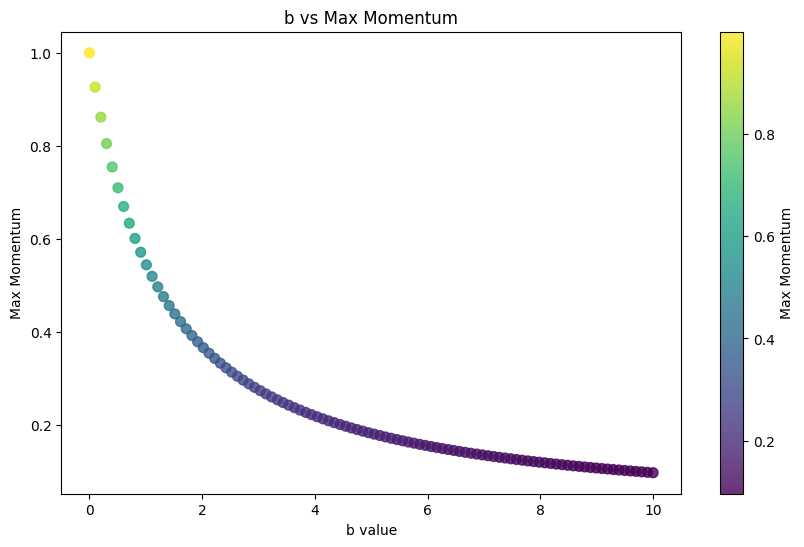

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df_results = pd.read_csv("damped_oscillation_analysis.csv")

# 2D 산점도: b vs Max Momentum
def plot_2d_b_vs_max_momentum():
    plt.figure(figsize=(10, 6))

    # 산점도 생성 (색상은 'viridis' 컬러맵 사용)
    scatter = plt.scatter(
        df_results['b'],
        df_results['Max Momentum'],
        c=df_results['Max Momentum'],
        cmap='viridis',
        s=50,
        alpha=0.8
    )

    # 축 및 색상바 설정
    plt.xlabel('b value')
    plt.ylabel('Max Momentum')
    plt.title('b vs Max Momentum')

    # 색상바 추가
    cbar = plt.colorbar(scatter)
    cbar.set_label('Max Momentum')

    # 그래프 표시
    plt.show()

# 함수 실행
plot_2d_b_vs_max_momentum()


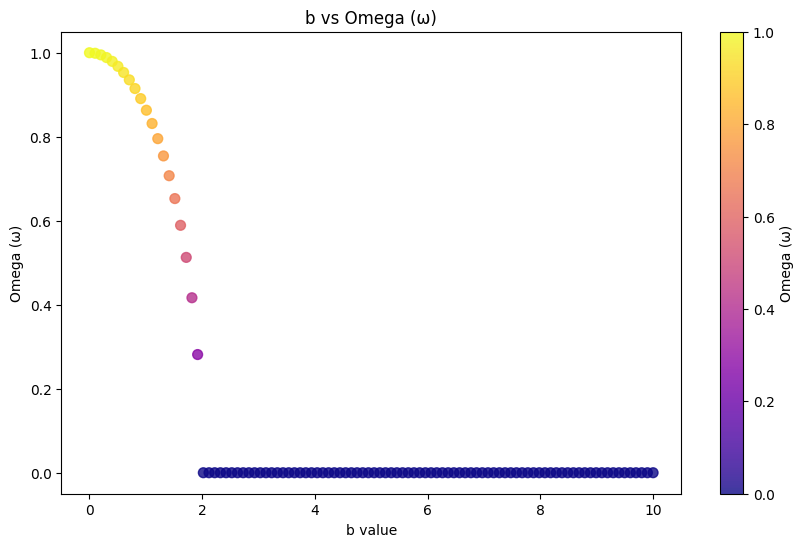

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df_results = pd.read_csv("damped_oscillation_analysis.csv")

# 상수 설정 (필요한 값, m = 1, k = 1로 가정)
m = 1  # 질량
k = 1  # 스프링 상수

# ω 계산 함수 정의
def calculate_omega(b, m, k):
    discriminant = (k / m) - (b ** 2 / (4 * m ** 2))
    omega = np.sqrt(discriminant) if discriminant >= 0 else 0  # 음수 판별식 방지
    return omega

# ω 값을 DataFrame에 추가
df_results['Omega'] = df_results['b'].apply(lambda b: calculate_omega(b, m, k))

# 2D 산점도: b vs Omega
def plot_2d_b_vs_omega():
    plt.figure(figsize=(10, 6))

    # 산점도 생성 (색상은 'plasma' 컬러맵 사용)
    scatter = plt.scatter(
        df_results['b'],
        df_results['Omega'],
        c=df_results['Omega'],
        cmap='plasma',
        s=50,
        alpha=0.8
    )

    # 축 및 색상바 설정
    plt.xlabel('b value')
    plt.ylabel('Omega (ω)')
    plt.title('b vs Omega (ω)')

    # 색상바 추가
    cbar = plt.colorbar(scatter)
    cbar.set_label('Omega (ω)')

    # 그래프 표시
    plt.show()

# 함수 실행
plot_2d_b_vs_omega()


<ipython-input-10-ad1958dcab9b>:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


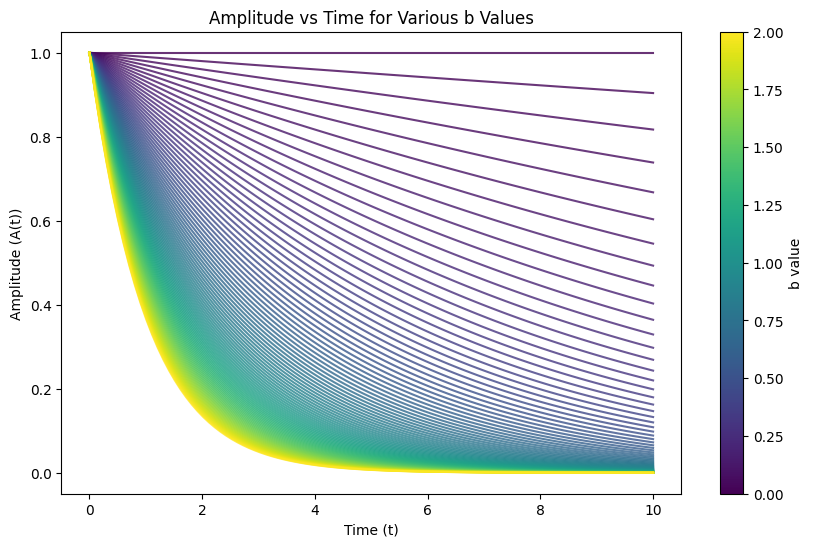

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 상수 설정 (필요한 값, m = 1, x_m = 1로 가정)
m = 1  # 질량
x_m = 1  # 초기 변위 또는 최대 변위

# A(t) 계산 함수 정의
def calculate_amplitude(b, t, m, x_m):
    return x_m * np.exp(-b * t / (2 * m))

# 시간 벡터 설정 (예: t = 0 ~ 10초, 100개 지점)
t_values = np.linspace(0, 10, 100)

# b 값 범위 설정 (예: 0 ~ 2, 100개 값)
b_values = np.linspace(0, 2, 100)

# 2D 그래프: 시간 t에 따른 진폭 A(t) (컬러맵 적용)
def plot_amplitude_with_colorbar(b_values):
    plt.figure(figsize=(10, 6))

    # 컬러맵 설정
    norm = plt.Normalize(vmin=b_values.min(), vmax=b_values.max())
    cmap = plt.get_cmap('viridis')

    # 각 b 값에 대해 A(t) 계산 및 그래프 그리기
    for b in b_values:
        A_t = calculate_amplitude(b, t_values, m, x_m)
        plt.plot(t_values, A_t, color=cmap(norm(b)), alpha=0.8)

    # 축 설정
    plt.xlabel('Time (t)')
    plt.ylabel('Amplitude (A(t))')
    plt.title('Amplitude vs Time for Various b Values')

    # 색상바 추가
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # 빈 배열로 설정 (필수)
    cbar = plt.colorbar(sm)
    cbar.set_label('b value')

    # 그래프 표시
    plt.show()

# 함수 실행
plot_amplitude_with_colorbar(b_values)


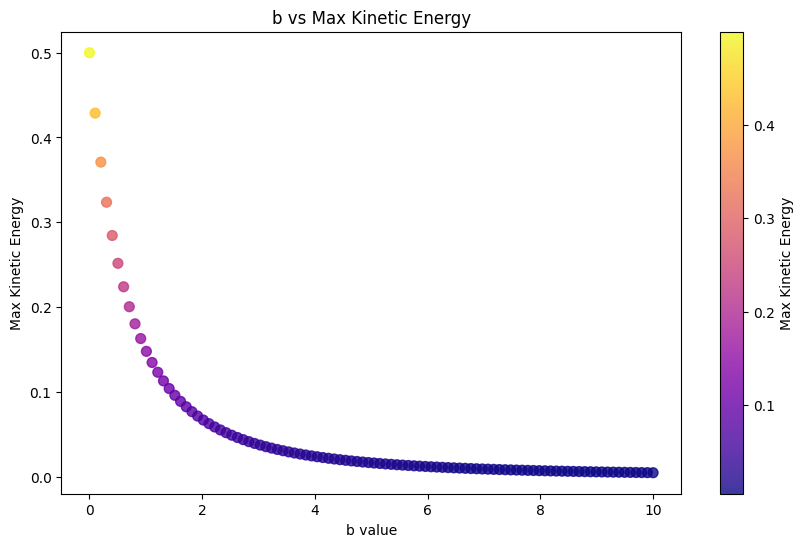

In [ ]:
# 2D 산점도: b vs Max Kinetic Energy
def plot_2d_b_vs_max_kinetic_energy():
    plt.figure(figsize=(10, 6))

    # 산점도 생성 (색상은 'plasma' 컬러맵 사용)
    scatter = plt.scatter(
        df_results['b'],
        df_results['Max Kinetic Energy'],
        c=df_results['Max Kinetic Energy'],
        cmap='plasma',
        s=50,
        alpha=0.8
    )

    # 축 및 색상바 설정
    plt.xlabel('b value')
    plt.ylabel('Max Kinetic Energy')
    plt.title('b vs Max Kinetic Energy')

    # 색상바 추가
    cbar = plt.colorbar(scatter)
    cbar.set_label('Max Kinetic Energy')

    # 그래프 표시
    plt.show()

# 함수 실행
plot_2d_b_vs_max_kinetic_energy()


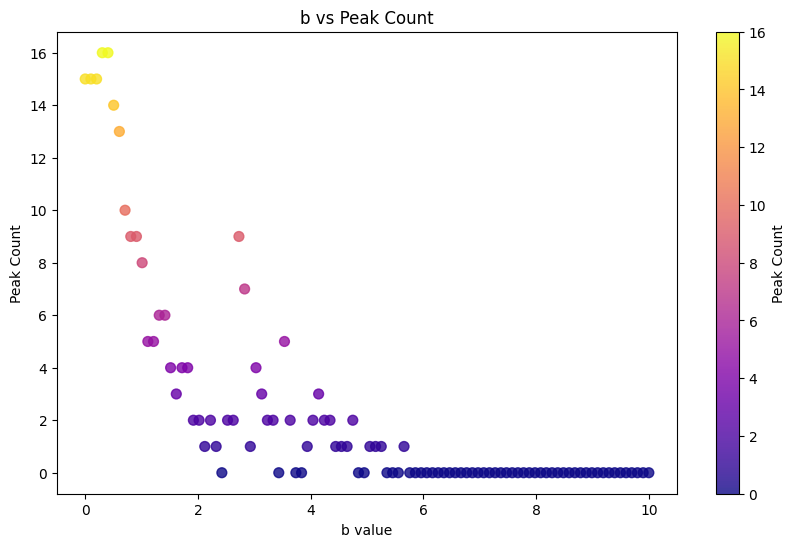

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df_results = pd.read_csv("damped_oscillation_analysis.csv")

# 2D 산점도 그래프 생성 함수
def plot_2d_b_vs_peak_count():
    plt.figure(figsize=(10, 6))

    # 산점도 생성 (점의 색은 'plasma' 컬러맵을 사용)
    scatter = plt.scatter(
        df_results['b'],
        df_results['Peak Count'],
        c=df_results['Peak Count'],
        cmap='plasma',
        s=50,  # 점 크기
        alpha=0.8  # 투명도
    )

    # 축 및 색상바 설정
    plt.xlabel('b value')
    plt.ylabel('Peak Count')
    plt.title('b vs Peak Count')

    # 색상바 추가
    cbar = plt.colorbar(scatter)
    cbar.set_label('Peak Count')

    # 그래프 표시
    plt.show()

# 함수 실행
plot_2d_b_vs_peak_count()


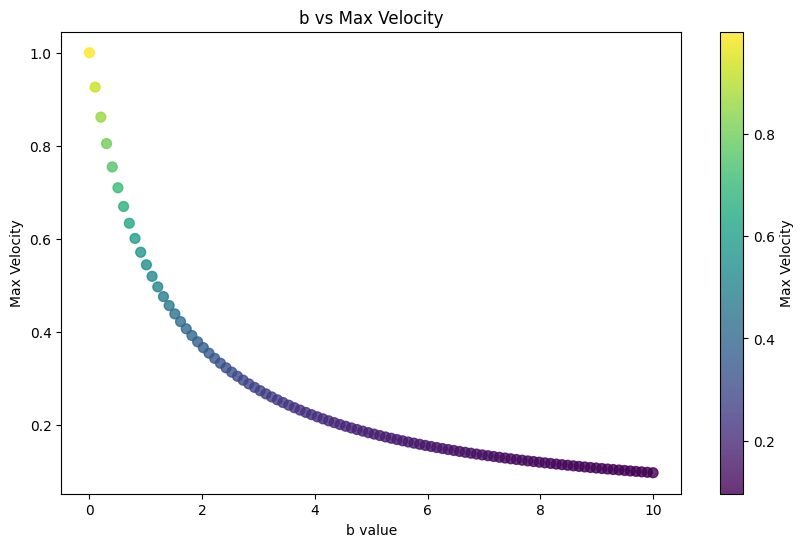

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df_results = pd.read_csv("damped_oscillation_analysis.csv")

# 2D 산점도 그래프 생성 함수
def plot_2d_b_vs_max_velocity():
    plt.figure(figsize=(10, 6))

    # 산점도 생성 (점의 색은 'viridis' 컬러맵을 사용)
    scatter = plt.scatter(
        df_results['b'],
        df_results['Max Velocity'],
        c=df_results['Max Velocity'],
        cmap='viridis',
        s=50,  # 점 크기
        alpha=0.8  # 투명도
    )

    # 축 및 색상바 설정
    plt.xlabel('b value')
    plt.ylabel('Max Velocity')
    plt.title('b vs Max Velocity')

    # 색상바 추가
    cbar = plt.colorbar(scatter)
    cbar.set_label('Max Velocity')

    # 그래프 표시
    plt.show()

# 함수 실행
plot_2d_b_vs_max_velocity()


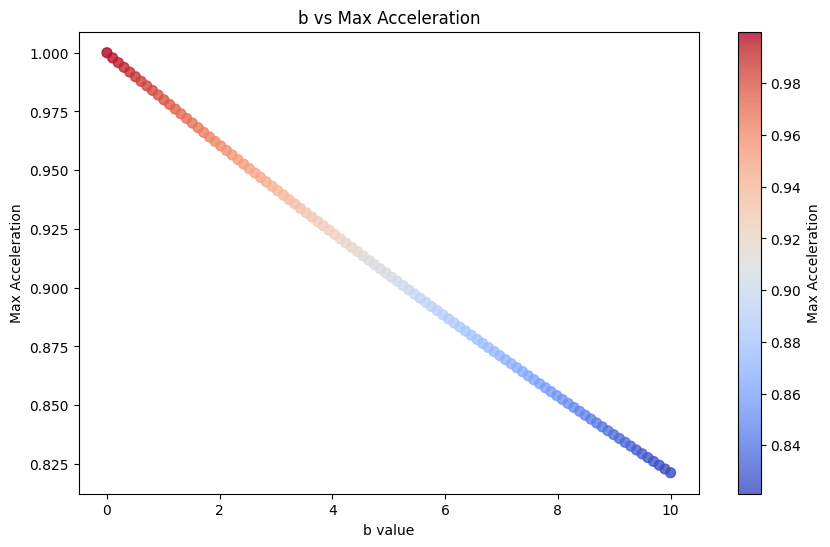

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df_results = pd.read_csv("damped_oscillation_analysis.csv")

# 2D 산점도 그래프 생성 함수
def plot_2d_b_vs_max_acceleration():
    plt.figure(figsize=(10, 6))

    # 산점도 생성 (점의 색은 'coolwarm' 컬러맵 사용)
    scatter = plt.scatter(
        df_results['b'],
        df_results['Max Acceleration'],
        c=df_results['Max Acceleration'],
        cmap='coolwarm',
        s=50,  # 점 크기
        alpha=0.8  # 투명도
    )

    # 축 및 색상바 설정
    plt.xlabel('b value')
    plt.ylabel('Max Acceleration')
    plt.title('b vs Max Acceleration')

    # 색상바 추가
    cbar = plt.colorbar(scatter)
    cbar.set_label('Max Acceleration')

    # 그래프 표시
    plt.show()

# 함수 실행
plot_2d_b_vs_max_acceleration()


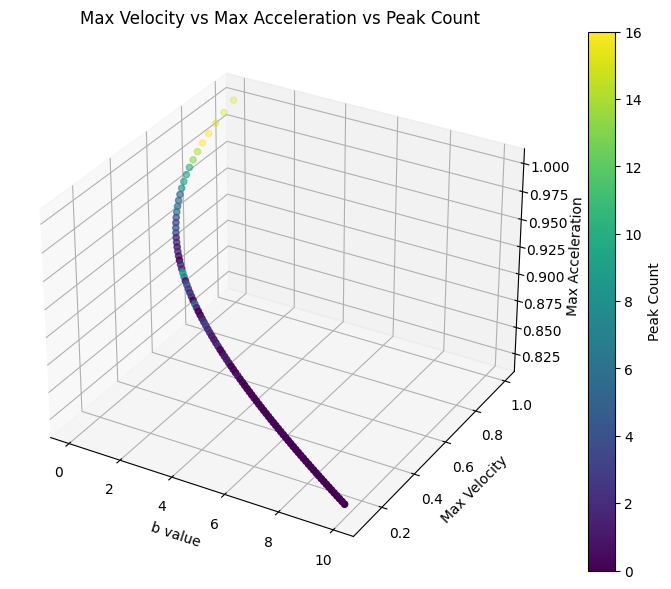

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CSV 파일 불러오기
df_results = pd.read_csv("damped_oscillation_analysis.csv")

# 3D 그래프 생성 함수
def plot_3d_feature_comparison(x_feature, y_feature, z_feature, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # 3D 산점도 생성
    scatter = ax.scatter(
        df_results['b'],
        df_results[x_feature],
        df_results[y_feature],
        c=df_results[z_feature],
        cmap='viridis'
    )

    # 축 라벨 설정
    ax.set_xlabel('b value')
    ax.set_ylabel(x_feature)
    ax.set_zlabel(y_feature)

    # 색상바 추가 (z_feature 값에 매핑)
    cbar = fig.colorbar(scatter)
    cbar.set_label(z_feature)

    # 그래프 제목 설정 및 표시
    plt.title(title)
    plt.show()

# 3D 그래프: b 값과 최대 속도, 최대 가속도, 피크 수 비교
plot_3d_feature_comparison('Max Velocity', 'Max Acceleration', 'Peak Count',
                           'Max Velocity vs Max Acceleration vs Peak Count')


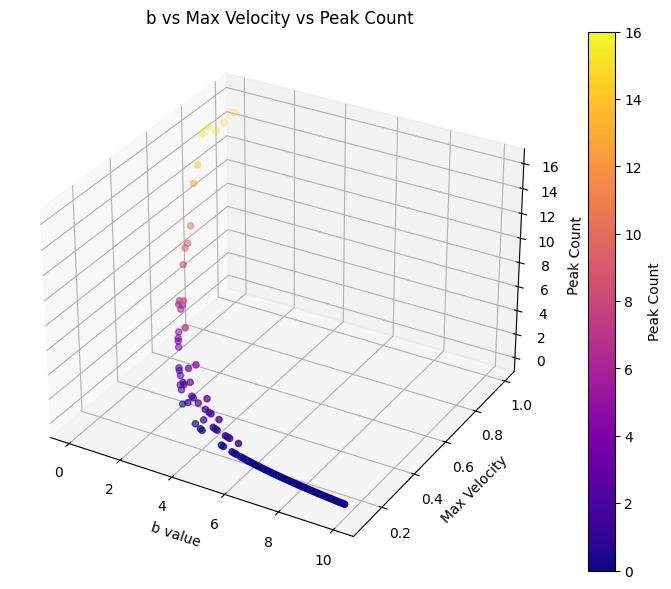

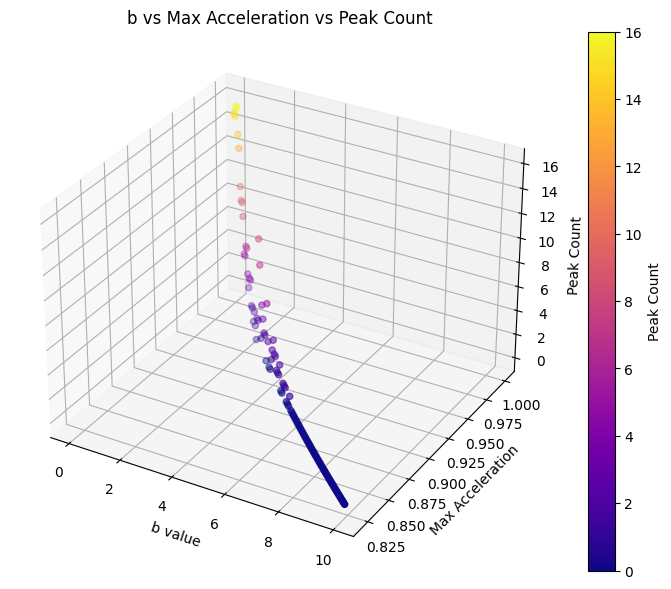

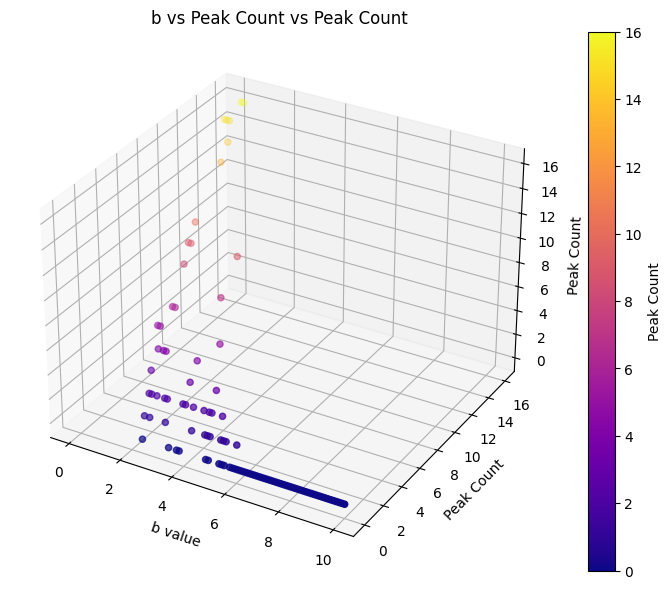

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CSV 파일 불러오기
df_results = pd.read_csv("damped_oscillation_analysis.csv")

# 3D 그래프 생성 함수
def plot_3d_single_feature(y_feature, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # 3D 산점도 생성
    scatter = ax.scatter(
        df_results['b'],
        df_results[y_feature],
        df_results['Peak Count'],
        c=df_results['Peak Count'],
        cmap='plasma'
    )

    # 축 라벨 설정
    ax.set_xlabel('b value')
    ax.set_ylabel(y_feature)
    ax.set_zlabel('Peak Count')

    # 색상바 추가
    cbar = fig.colorbar(scatter)
    cbar.set_label('Peak Count')

    # 그래프 제목 설정 및 표시
    plt.title(title)
    plt.show()

# b와 최대 속도 비교
plot_3d_single_feature('Max Velocity', 'b vs Max Velocity vs Peak Count')

# b와 최대 가속도 비교
plot_3d_single_feature('Max Acceleration', 'b vs Max Acceleration vs Peak Count')

# b와 피크 수 비교
plot_3d_single_feature('Peak Count', 'b vs Peak Count vs Peak Count')


**$D=b^2-4mk$를 통한 진동과 b의 연관관계 분석**

In [ ]:
import numpy as np

# m과 k 값 설정 (기본값: 1)
m = 1
k = 1

# b 값 설정 (0.1부터 10까지 100개의 값 생성)
b_values = np.linspace(0.1, 10, 100)

# 감쇠 유형을 결정하는 함수
def classify_damping_theoretically(b, m, k):
    discriminant = b**2 - 4 * m * k  # 판별식 계산
    if discriminant < 0:
        return "Underdamped"
    elif discriminant == 0:
        return "Critically Damped"
    else:
        return "Overdamped"

# 각 b 값에 대해 감쇠 유형 계산
damping_types = [classify_damping_theoretically(b, m, k) for b in b_values]

# 결과 출력
for i, b in enumerate(b_values):
    print(f"b = {b:.2f}: {damping_types[i]}")

# 감쇠 유형의 분포 확인
underdamped_count = damping_types.count("Underdamped")
critically_damped_count = damping_types.count("Critically Damped")
overdamped_count = damping_types.count("Overdamped")

# 분포 요약 출력
print("$nSummary:")
print(f"Underdamped: {underdamped_count}")
print(f"Critically Damped: {critically_damped_count}")
print(f"Overdamped: {overdamped_count}")


b = 0.10: Underdamped
b = 0.20: Underdamped
b = 0.30: Underdamped
b = 0.40: Underdamped
b = 0.50: Underdamped
b = 0.60: Underdamped
b = 0.70: Underdamped
b = 0.80: Underdamped
b = 0.90: Underdamped
b = 1.00: Underdamped
b = 1.10: Underdamped
b = 1.20: Underdamped
b = 1.30: Underdamped
b = 1.40: Underdamped
b = 1.50: Underdamped
b = 1.60: Underdamped
b = 1.70: Underdamped
b = 1.80: Underdamped
b = 1.90: Underdamped
b = 2.00: Critically Damped
b = 2.10: Overdamped
b = 2.20: Overdamped
b = 2.30: Overdamped
b = 2.40: Overdamped
b = 2.50: Overdamped
b = 2.60: Overdamped
b = 2.70: Overdamped
b = 2.80: Overdamped
b = 2.90: Overdamped
b = 3.00: Overdamped
b = 3.10: Overdamped
b = 3.20: Overdamped
b = 3.30: Overdamped
b = 3.40: Overdamped
b = 3.50: Overdamped
b = 3.60: Overdamped
b = 3.70: Overdamped
b = 3.80: Overdamped
b = 3.90: Overdamped
b = 4.00: Overdamped
b = 4.10: Overdamped
b = 4.20: Overdamped
b = 4.30: Overdamped
b = 4.40: Overdamped
b = 4.50: Overdamped
b = 4.60: Overdamped
b = 4.70

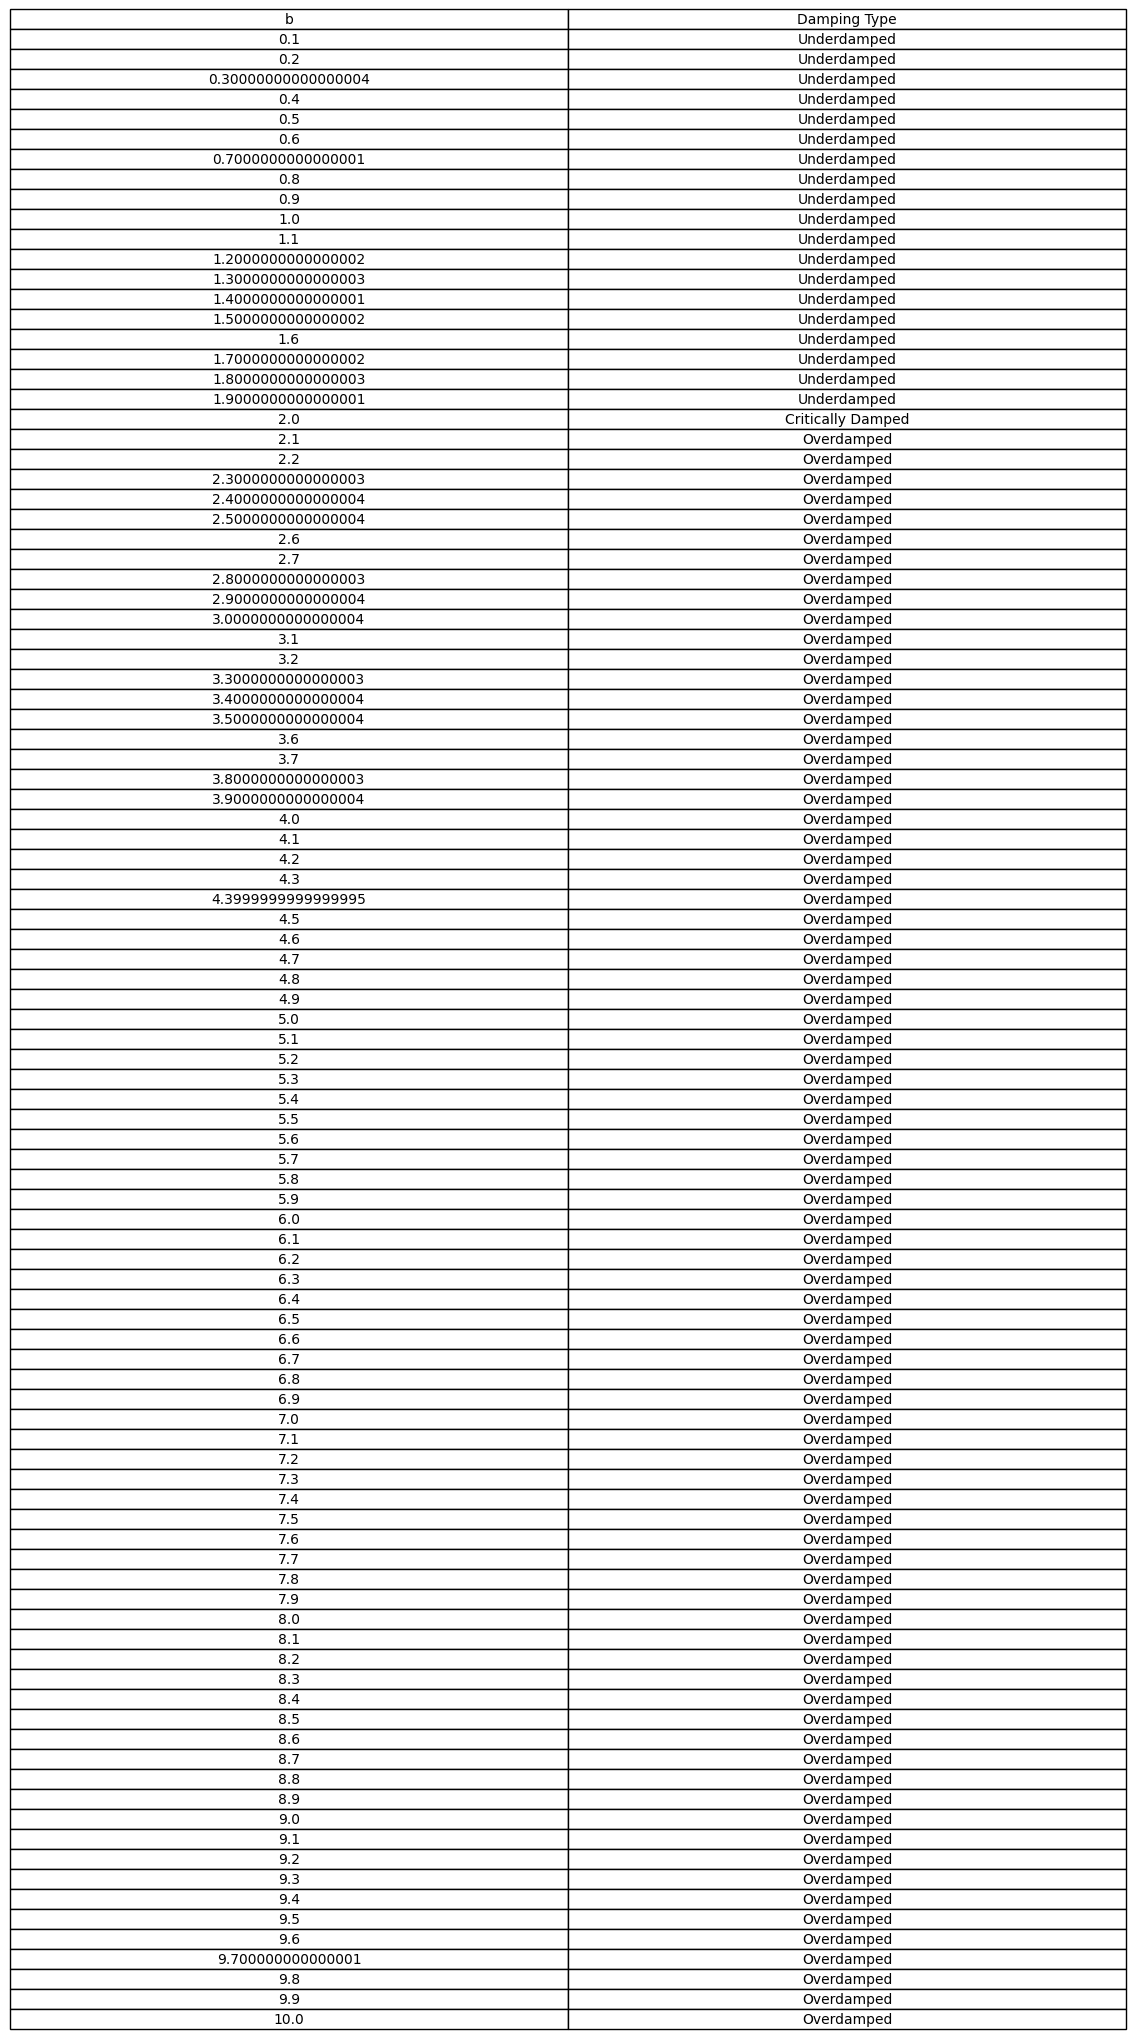

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# m과 k 값 설정 (기본값: 1)
m = 1
k = 1

# b 값 설정 (0.1부터 10까지 100개의 값 생성)
b_values = np.linspace(0.1, 10, 100)

# 감쇠 유형을 결정하는 함수
def classify_damping_theoretically(b, m, k):
    discriminant = b**2 - 4 * m * k  # 판별식 계산
    if discriminant < 0:
        return "Underdamped"
    elif discriminant == 0:
        return "Critically Damped"
    else:
        return "Overdamped"

# 각 b 값에 대해 감쇠 유형 계산
damping_types = [classify_damping_theoretically(b, m, k) for b in b_values]

# 데이터프레임 생성
df = pd.DataFrame({"b": b_values, "Damping Type": damping_types})

# 분포 요약 계산
underdamped_count = damping_types.count("Underdamped")
critically_damped_count = damping_types.count("Critically Damped")
overdamped_count = damping_types.count("Overdamped")

summary_data = pd.DataFrame({
    "Type": ["Underdamped", "Critically Damped", "Overdamped"],
    "Count": [underdamped_count, critically_damped_count, overdamped_count]
})

# 표 스타일 설정 및 출력
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].axis('off')
ax[1].axis('off')

# b 값과 감쇠 유형 테이블 표시
table1 = ax[0].table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
table1.scale(1.2, 1.2)
'''
# 요약 테이블 표시
table2 = ax[1].table(cellText=summary_data.values, colLabels=summary_data.columns, cellLoc='center', loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
table2.scale(1.5, 1.5)
'''
# 그래프 출력
plt.show()
